In [1]:
!pip install yfinance lxml

  Using cached yfinance-0.2.55-py2.py3-none-any.whl.metadata (5.8 kB)
  Using cached lxml-5.3.2-cp311-cp311-win_amd64.whl.metadata (3.7 kB)
  Using cached multitasking-0.0.11-py3-none-any.whl.metadata (5.5 kB)
  Using cached frozendict-2.4.6-py311-none-any.whl.metadata (23 kB)
  Using cached peewee-3.17.9-py3-none-any.whl
Using cached yfinance-0.2.55-py2.py3-none-any.whl (109 kB)
Using cached lxml-5.3.2-cp311-cp311-win_amd64.whl (3.8 MB)
Using cached frozendict-2.4.6-py311-none-any.whl (16 kB)
Using cached multitasking-0.0.11-py3-none-any.whl (8.5 kB)


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import requests
from io import StringIO

In [3]:
ticker = yf.Ticker('005930.KS')
quotes = ticker.history(period='max', interval='1d')

In [5]:
print( quotes.shape )
quotes.head()

(6330, 7)


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2000-01-04 00:00:00+09:00,4296.628861,4375.400391,4053.153226,4375.400391,74195000,0.0,0.0
2000-01-05 00:00:00+09:00,4153.409069,4339.596373,3952.899666,3995.865967,74680000,0.0,0.0
2000-01-06 00:00:00+09:00,4117.602159,4139.085301,3995.864356,4024.508545,54390000,0.0,0.0
2000-01-07 00:00:00+09:00,3981.543535,4060.315079,3838.322544,3967.221436,40305000,0.0,0.0
2000-01-10 00:00:00+09:00,4010.186985,4131.924805,3995.864889,4131.924805,46880000,0.0,0.0


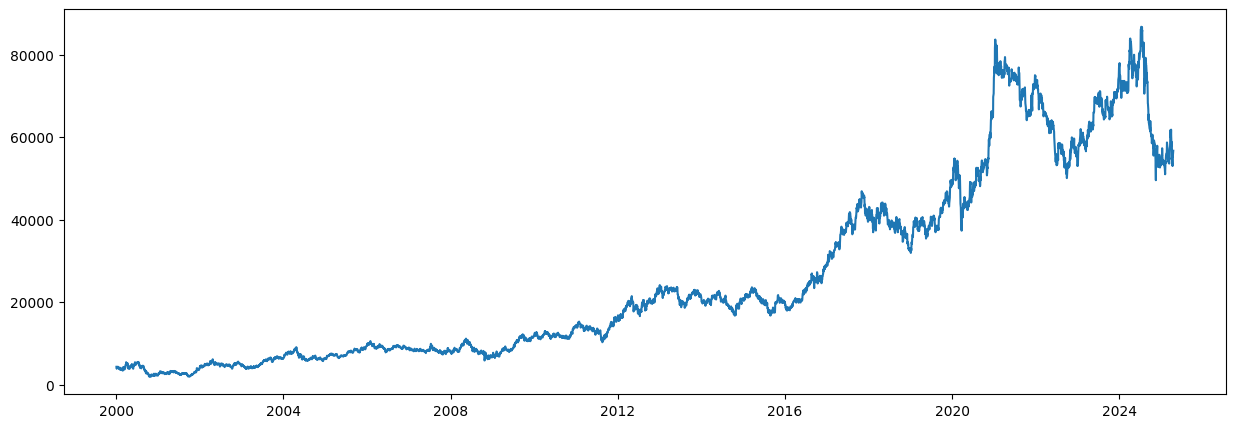

In [6]:
plt.figure(figsize=(15, 5))
plt.plot(quotes.index, quotes['Close'])
plt.show()

In [7]:
api_url = 'http://kind.krx.co.kr/corpgeneral/corpList.do'
params = {
    "method": "download",
    "marketType": "stockMkt" # kosdaqMkt (KOSDAQ)
}

resp = requests.get(api_url, params)

In [ ]:
print( resp.text )

In [17]:
pd.read_html(StringIO(resp.text))[0].head()

,회사명,종목코드,업종,주요제품,상장일,결산월,대표자명,홈페이지,지역
0,DSR제강,69730,1차 철강 제조업,"와이어로프,각종 경강선,철선제품,PC강선,아연도 강연선 제조",2003-01-28,12월,"홍하종, 홍석빈 (각자 대표이사)",http://www.dsrcorp.com,전라남도
1,GS글로벌,1250,상품 종합 도매업,"수출입업(시멘트,철강금속,전기전자,섬유,기계화학),상품중개,광업,채석업/하수처리 서...",1976-06-26,12월,이영환,http://www.gsgcorp.com,서울특별시
2,HDC랩스,39570,전기 및 통신 공사업,"기계설비공사, 스마트홈, 지능형 빌딩, SOC, 인테리어, 조경, 시설관리",2015-09-24,12월,김성은,http://www.hdc-labs.com/,서울특별시
3,HDC현대산업개발,294870,건물 건설업,"외주주택, 자체공사, 일반건축, 토목 등",2018-06-12,12월,"정경구, 조태제(각자 대표이사)",http://www.hdc-dvp.com,서울특별시
4,HD현대,267250,기타 금융업,지주회사,2017-05-10,12월,"권오갑, 정기선",http://www.hd.com,경기도


In [23]:
api_url = 'http://kind.krx.co.kr/corpgeneral/corpList.do'
params = {
    "method": "download",
    "marketType": "stockMkt" # kosdaqMkt (KOSDAQ)
}

resp = requests.get(api_url, params)
df_kospi = pd.read_html(StringIO(resp.text))[0]
df_kospi['종목코드'] = df_kospi['종목코드'].map(lambda v: f'{v}.KS')

params['marketType'] = 'kosdaqMkt'
resp = requests.get(api_url, params)
df_kosdaq = pd.read_html(StringIO(resp.text))[0]
df_kosdaq['종목코드'] = df_kosdaq['종목코드'].map(lambda v: f'{v}.KQ')

df_stocks = pd.concat([df_kospi, df_kosdaq])

In [39]:
print( df_stocks.shape )
df_stocks[['회사명', '종목코드']].head()

(2641, 9)


,회사명,종목코드
0,DSR제강,69730.KS
1,GS글로벌,1250.KS
2,HDC랩스,39570.KS
3,HDC현대산업개발,294870.KS
4,HD현대,267250.KS


In [42]:
df_stocks[['회사명', '종목코드']].to_csv('stock-code.csv', encoding='utf-8', index=False)

In [ ]:
import random
s = pd.Series([1, 2, 3, 4, 5, 6, 7])
ns = []
for v in s:
    ns.append(v* random.randint(100, 1000))
ns = pd.Series(ns)
print( ns )

ns2 = s.map( lambda v: v * random.randint(100, 1000) ) # 반복문을 통해 각 값에 대해 전달인자에 지정된 함수 실행
print( ns2 )


0     106
1    1826
2     369
3    3176
4    3650
5    2274
6    2996
dtype: int64
0     746
1    1432
2    1824
3     536
4    1105
5    2076
6    2380
dtype: int64


In [ ]:
import random
df = pd.DataFrame({'a': [1, 2, 3, 4, 5, 6, 7], 'b': [10, 20, 30, 40, 50, 60, 70] })
df

# df.map(lambda row: print(row))
# df.apply(lambda row: print(row, type(row)), axis=1)
df.apply(lambda row: row['a'] + row['b'], axis=1) # def(row): return row['a'] + row['b']

0    11
1    22
2    33
3    44
4    55
5    66
6    77
dtype: int64